In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/UMTMVS.csv', index_col='DATE', parse_dates=True)

In [3]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [4]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

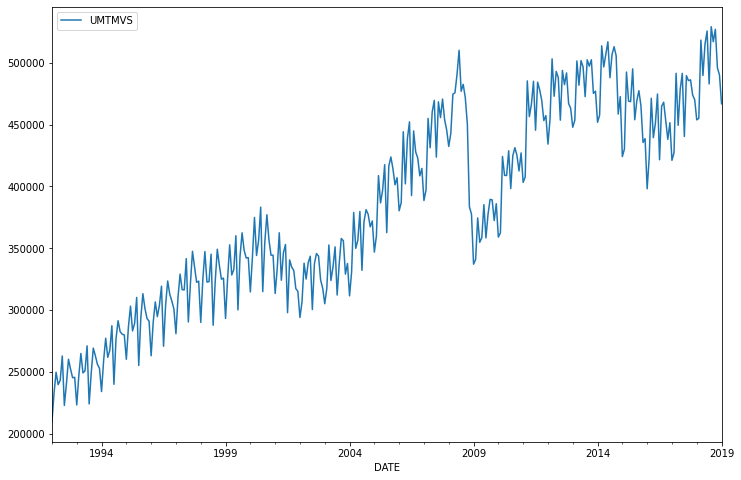

In [5]:
df.plot(figsize=(12,8));

In [6]:
#What was the percent increase in value from Jan 2009 to Jan 2019?
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

In [7]:
#What was the percent decrease from Jan 2008 to Jan 2009?
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

In [8]:
#what is the month with the least value after 2005?
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [9]:
#what 6 months have the highest value?
df.sort_values(by='UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


In [10]:
# How many millions of dollars in value was lost in 2008
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

<AxesSubplot:xlabel='DATE'>

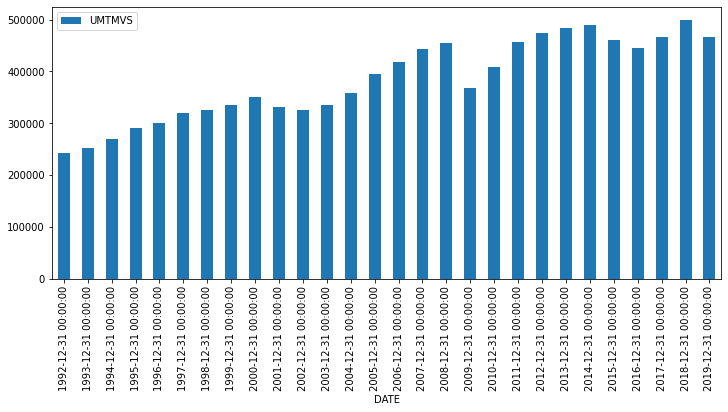

In [11]:
#the average Value in millions of dollars per year
df.resample('Y').mean().plot.bar(figsize=(12,5))

In [12]:
#what year had the biggest increase in mean value from the pervious year's mean value?
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)

In [13]:
change = yearly_data - yearly_data_shift
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

In [14]:
change2 = yearly_data_shift - yearly_data
change2['UMTMVS'].idxmax()

Timestamp('2009-12-31 00:00:00', freq='A-DEC')

<AxesSubplot:xlabel='DATE'>

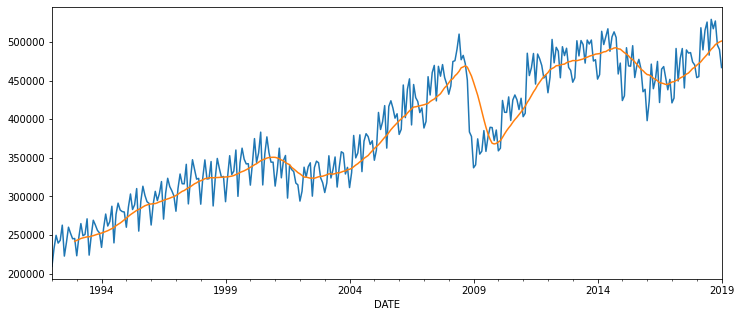

In [20]:
df['UMTMVS'].plot(figsize=(12,5))
df['UMTMVS'].rolling(window=12).mean().plot()

In [21]:
# How many months did it take to surpass the 2008 peak
df2008 = df.loc['2008-01-01': '2008-12-01']
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [23]:
df_post_peak = df.loc['2008-06-01':]
df_post_peak[df_post_peak >= df2008.max()].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [27]:
len(df.loc['2008-06-01':'2014-03-01'])

70